## Get Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download techsash/waste-classification-data

 99% 422M/427M [00:06<00:00, 72.8MB/s]
100% 427M/427M [00:06<00:00, 70.1MB/s]


In [ ]:
! unzip '/content/waste-classification-data.zip' -d '/content/drive/MyDrive/waste-classification-data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/drive/MyDrive/waste-classification-data

## Get usable Functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/UdityaRaj11/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-07 07:10:25--  https://raw.githubusercontent.com/UdityaRaj11/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-07 07:10:25 (80.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# import series of helper functions for the notebook
from helper_functions import  create_tensorboard_callback, plot_loss_curves, compare_historys

## Inspect Data

In [ ]:
! ls /content/drive/MyDrive/waste-classification-data/DATASET

TEST  TRAIN


In [ ]:
! ls /content/drive/MyDrive/waste-classification-data/DATASET/TEST

O  R


In [ ]:
! ls /content/drive/MyDrive/waste-classification-data/DATASET/TEST/O

O_12568.jpg  O_12769.jpg  O_12970.jpg  O_13171.jpg  O_13372.jpg  O_13573.jpg  O_13774.jpg
O_12569.jpg  O_12770.jpg  O_12971.jpg  O_13172.jpg  O_13373.jpg  O_13574.jpg  O_13775.jpg
O_12570.jpg  O_12771.jpg  O_12972.jpg  O_13173.jpg  O_13374.jpg  O_13575.jpg  O_13776.jpg
O_12571.jpg  O_12772.jpg  O_12973.jpg  O_13174.jpg  O_13375.jpg  O_13576.jpg  O_13777.jpg
O_12572.jpg  O_12773.jpg  O_12974.jpg  O_13175.jpg  O_13376.jpg  O_13577.jpg  O_13778.jpg
O_12573.jpg  O_12774.jpg  O_12975.jpg  O_13176.jpg  O_13377.jpg  O_13578.jpg  O_13779.jpg
O_12574.jpg  O_12775.jpg  O_12976.jpg  O_13177.jpg  O_13378.jpg  O_13579.jpg  O_13780.jpg
O_12575.jpg  O_12776.jpg  O_12977.jpg  O_13178.jpg  O_13379.jpg  O_13580.jpg  O_13781.jpg
O_12576.jpg  O_12777.jpg  O_12978.jpg  O_13179.jpg  O_13380.jpg  O_13581.jpg  O_13782.jpg
O_12577.jpg  O_12778.jpg  O_12979.jpg  O_13180.jpg  O_13381.jpg  O_13582.jpg  O_13783.jpg
O_12578.jpg  O_12779.jpg  O_12980.jpg  O_13181.jpg  O_13382.jpg  O_13583.jpg  O_13784.jpg
O_12579.jp

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/waste-classification-data/DATASET"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' . ")

There are 2 directories and 0 images in '/content/drive/MyDrive/waste-classification-data/DATASET' . 
There are 2 directories and 0 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TEST' . 
There are 0 directories and 1401 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TEST/O' . 
There are 0 directories and 1112 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TEST/R' . 
There are 2 directories and 0 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN' . 
There are 0 directories and 12565 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN/O' . 
There are 0 directories and 9999 images in '/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN/R' . 


In [ ]:
# Another way to find out how many images are in a file
num_o_images_train = len(os.listdir("/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN/O"))
num_o_images_train

12565

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['O' 'R']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (194, 259, 3)


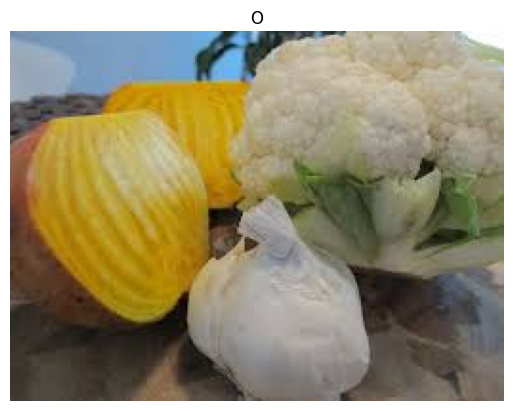

In [ ]:
# View random image from training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN/",
                        target_class="O")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(194, 259, 3), dtype=uint8, numpy=
array([[[115, 139, 167],
        [116, 140, 168],
        [118, 141, 172],
        ...,
        [250, 255, 254],
        [247, 255, 254],
        [247, 255, 254]],

       [[115, 139, 167],
        [116, 140, 168],
        [117, 140, 171],
        ...,
        [251, 255, 254],
        [248, 255, 254],
        [248, 255, 254]],

       [[119, 143, 171],
        [119, 143, 171],
        [119, 143, 171],
        ...,
        [254, 254, 254],
        [253, 254, 255],
        [253, 254, 255]],

       ...,

       [[ 62,  55,  47],
        [ 62,  55,  47],
        [ 63,  56,  48],
        ...,
        [112, 102,  93],
        [112, 103,  94],
        [112, 103,  94]],

       [[ 70,  63,  57],
        [ 73,  66,  60],
        [ 63,  56,  50],
        ...,
        [110, 101,  92],
        [112, 103,  94],
        [116, 107,  98]],

       [[ 70,  63,  57],
        [ 73,  66,  60],
        [ 63,  56,  50],
        ...,
        [110, 101,  9

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.45098039, 0.54509804, 0.65490196],
        [0.45490196, 0.54901961, 0.65882353],
        [0.4627451 , 0.55294118, 0.6745098 ],
        ...,
        [0.98039216, 1.        , 0.99607843],
        [0.96862745, 1.        , 0.99607843],
        [0.96862745, 1.        , 0.99607843]],

       [[0.45098039, 0.54509804, 0.65490196],
        [0.45490196, 0.54901961, 0.65882353],
        [0.45882353, 0.54901961, 0.67058824],
        ...,
        [0.98431373, 1.        , 0.99607843],
        [0.97254902, 1.        , 0.99607843],
        [0.97254902, 1.        , 0.99607843]],

       [[0.46666667, 0.56078431, 0.67058824],
        [0.46666667, 0.56078431, 0.67058824],
        [0.46666667, 0.56078431, 0.67058824],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99607843, 1.        ],
        [0.99215686, 0.99607843, 1.        ]],

       ...,

       [[0.24313725, 0.21568627, 0.18431373],
        [0.24313725, 0.21568627, 0.18431373],
        [0.24705882, 0

## Data Preprocessing and first model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also called normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/drive/MyDrive/waste-classification-data/DATASET/TRAIN"
test_dir = "/content/drive/MyDrive/waste-classification-data/DATASET/TEST"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/5
706/706 [==============================] - 92s 114ms/step - loss: 0.4315 - accuracy: 0.8054 - val_loss: 0.3986 - val_accuracy: 0.8456
Epoch 2/5
706/706 [==============================] - 74s 104ms/step - loss: 0.3778 - accuracy: 0.8386 - val_loss: 0.3548 - val_accuracy: 0.8675
Epoch 3/5
706/706 [==============================] - 73s 104ms/step - loss: 0.3416 - accuracy: 0.8571 - val_loss: 0.3520 - val_accuracy: 0.8655
Epoch 4/5
706/706 [==============================] - 72s 103ms/step - loss: 0.3067 - accuracy: 0.8736 - val_loss: 0.3296 - val_accuracy: 0.8782
Epoch 5/5
706/706 [==============================] - 79s 112ms/step - loss: 0.2673 - accuracy: 0.8924 - val_loss: 0.3982 - val_accuracy: 0.8516


In [ ]:
# Get a model Summary
model_1.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Get a sample of training data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in train_Data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

706

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Creating a baseline model (CNN)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get the summary of our model
model_2.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit the data

In [ ]:
# Check the length of training and test data generators
len(train_data), len(valid_data)

(706, 79)

In [ ]:
# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
706/706 [==============================] - 76s 105ms/step - loss: 0.4893 - accuracy: 0.7991 - val_loss: 0.3701 - val_accuracy: 0.8715
Epoch 2/5
706/706 [==============================] - 73s 103ms/step - loss: 0.3620 - accuracy: 0.8476 - val_loss: 0.3577 - val_accuracy: 0.8659
Epoch 3/5
706/706 [==============================] - 73s 103ms/step - loss: 0.2373 - accuracy: 0.9078 - val_loss: 0.3580 - val_accuracy: 0.8770
Epoch 4/5
706/706 [==============================] - 74s 104ms/step - loss: 0.1287 - accuracy: 0.9552 - val_loss: 0.4347 - val_accuracy: 0.8611
Epoch 5/5
706/706 [==============================] - 71s 101ms/step - loss: 0.0788 - accuracy: 0.9750 - val_loss: 0.6679 - val_accuracy: 0.8384


### Evaluate model

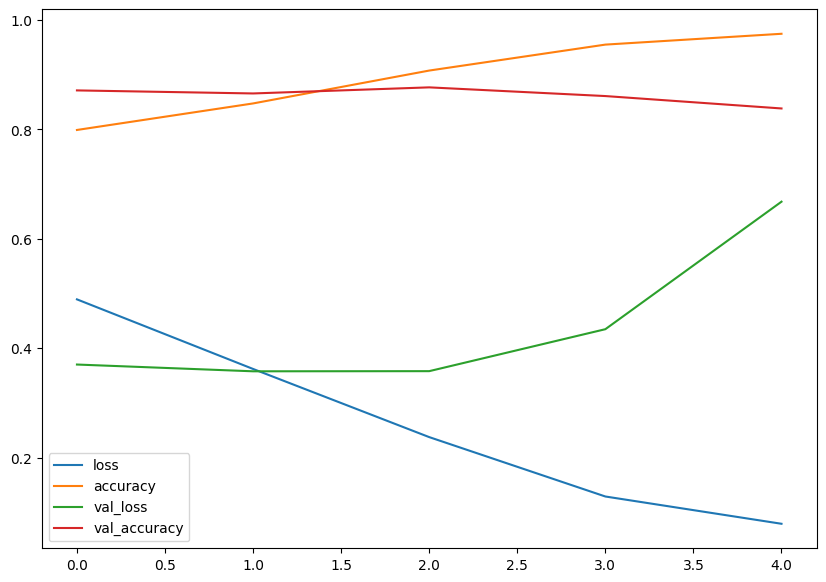

In [ ]:
# Let's plt the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

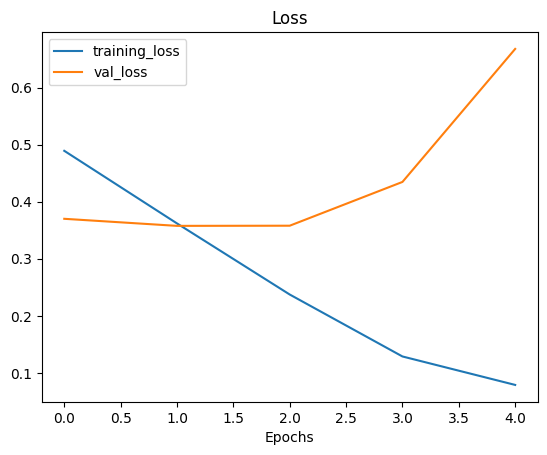

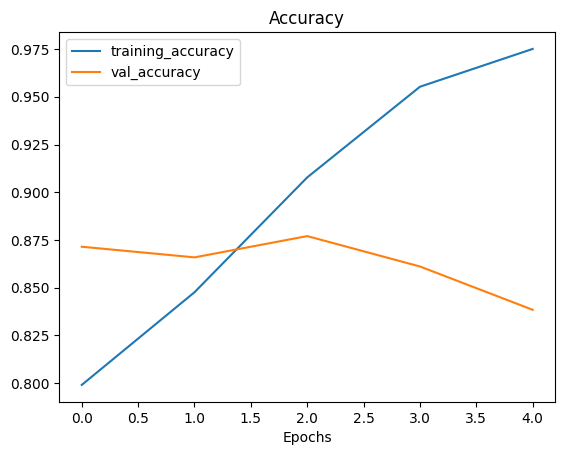

In [ ]:
plot_loss_curves(history_2)

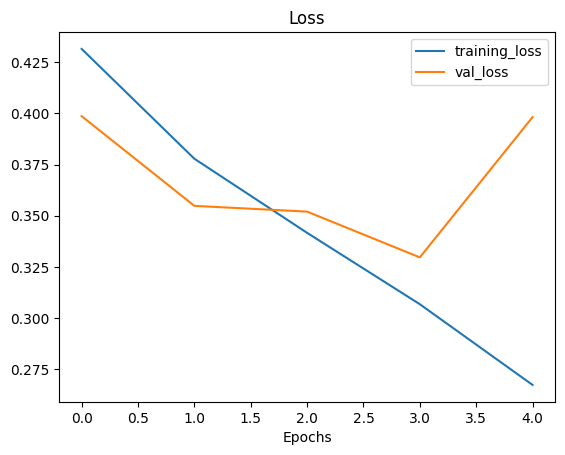

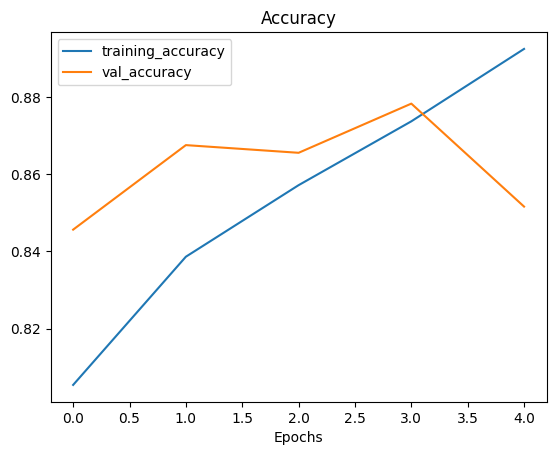

In [ ]:
plot_loss_curves(history_1)

## New baseline Model

In [ ]:
# Create Model
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
706/706 [==============================] - 76s 104ms/step - loss: 0.4456 - accuracy: 0.7951 - val_loss: 0.3557 - val_accuracy: 0.8651
Epoch 2/5
706/706 [==============================] - 76s 108ms/step - loss: 0.3968 - accuracy: 0.8255 - val_loss: 0.3042 - val_accuracy: 0.8850
Epoch 3/5
706/706 [==============================] - 72s 102ms/step - loss: 0.3696 - accuracy: 0.8416 - val_loss: 0.3376 - val_accuracy: 0.8687
Epoch 4/5
706/706 [==============================] - 72s 102ms/step - loss: 0.3540 - accuracy: 0.8497 - val_loss: 0.3543 - val_accuracy: 0.8639
Epoch 5/5
706/706 [==============================] - 74s 104ms/step - loss: 0.3361 - accuracy: 0.8606 - val_loss: 0.3131 - val_accuracy: 0.8798


In [ ]:
# get model Summary
model_3.summary();

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 10)       

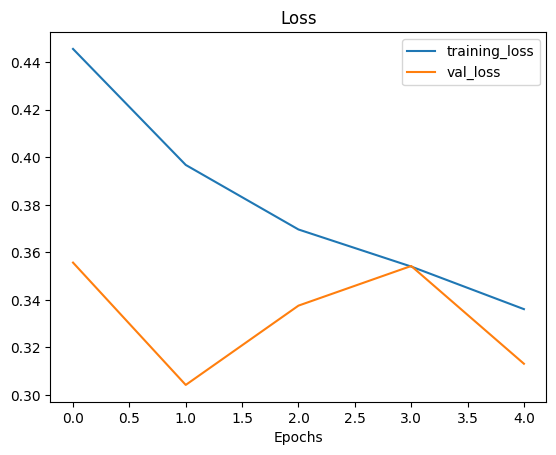

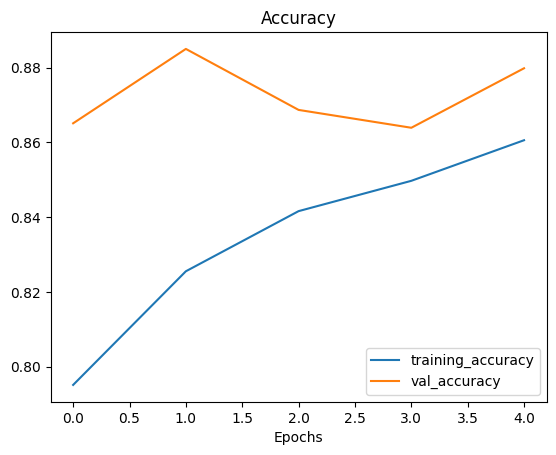

In [ ]:
# Plot loss curves
plot_loss_curves(history_3)

## Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentaion
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only
print("Non-augmented training data:")
# Create  non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                               )
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 22564 images belonging to 2 classes.
Non-augmented training data:
Found 22564 images belonging to 2 classes.
Non-augmented test data:
Found 2513 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number:31


(-0.5, 223.5, 223.5, -0.5)

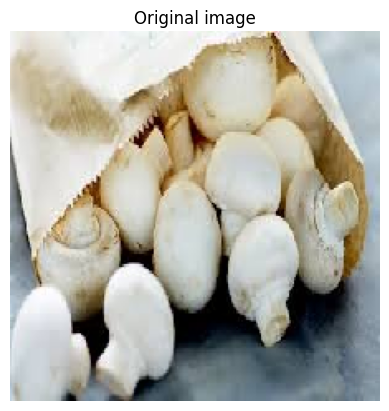

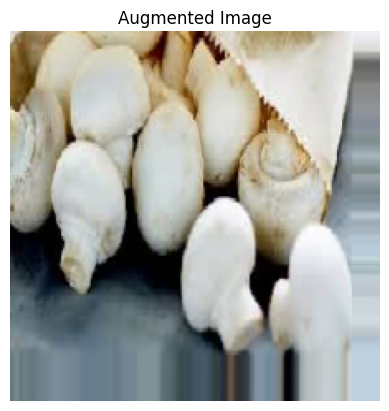

In [ ]:
# Show original image and augmented image
import random
random_number =  random.randint(0, 32) # our bacth size are 32...
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 22564 images belonging to 2 classes.


## Final Model

In [ ]:
# Create a model
model_4 = Sequential([
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
706/706 [==============================] - 370s 517ms/step - loss: 0.4716 - accuracy: 0.7853 - val_loss: 0.4628 - val_accuracy: 0.8170
Epoch 2/15
706/706 [==============================] - 358s 507ms/step - loss: 0.3963 - accuracy: 0.8299 - val_loss: 0.3121 - val_accuracy: 0.8886
Epoch 3/15
706/706 [==============================] - 358s 508ms/step - loss: 0.3619 - accuracy: 0.8512 - val_loss: 0.2477 - val_accuracy: 0.9172
Epoch 4/15
706/706 [==============================] - 360s 510ms/step - loss: 0.3493 - accuracy: 0.8574 - val_loss: 0.2902 - val_accuracy: 0.9005
Epoch 5/15
706/706 [==============================] - 354s 502ms/step - loss: 0.3344 - accuracy: 0.8646 - val_loss: 0.2694 - val_accuracy: 0.9009
Epoch 6/15
706/706 [==============================] - 358s 506ms/step - loss: 0.3342 - accuracy: 0.8641 - val_loss: 0.2415 - val_accuracy: 0.9244
Epoch 7/15
706/706 [==============================] - 358s 507ms/step - loss: 0.3288 - accuracy: 0.8681 - val_loss: 0.2674 -

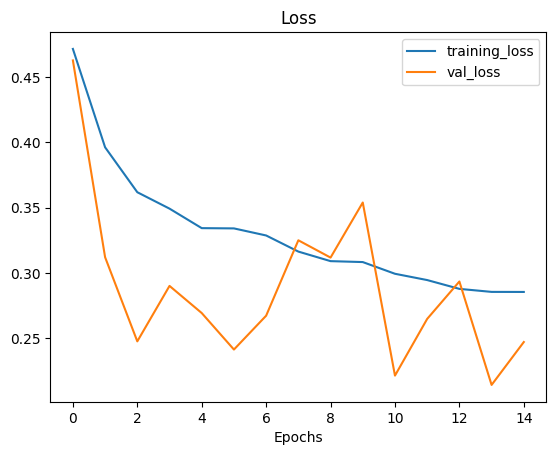

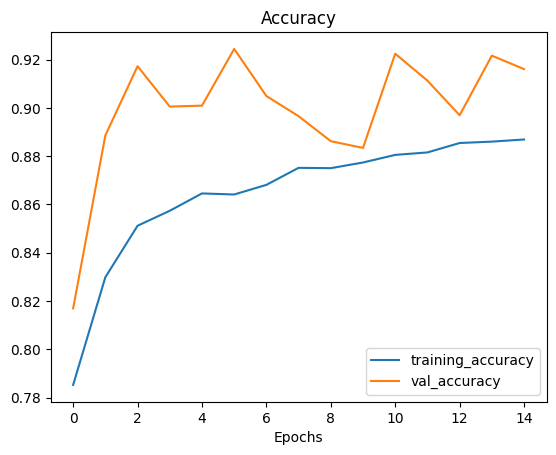

In [ ]:
plot_loss_curves(history_4)

## Make Predictions

In [ ]:
# View our example image
!wget https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
steak = mpimg.imread("Grilled-steak.jpg")

--2023-12-07 09:50:27--  https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
Resolving www.firstforwomen.com (www.firstforwomen.com)... 192.0.66.160
Connecting to www.firstforwomen.com (www.firstforwomen.com)|192.0.66.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803602 (785K) [image/jpeg]
Saving to: ‘Grilled-steak.jpg’

Grilled-steak.jpg   100%[===================>] 784.77K  --.-KB/s    in 0.1s    

2023-12-07 09:50:27 (5.19 MB/s) - ‘Grilled-steak.jpg’ saved [803602/803602]



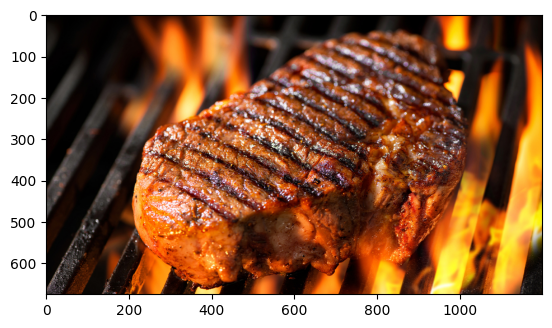

In [ ]:
plt.imshow(steak)

In [ ]:
# Create a function to import an image and resize it to be abale to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
Organic = load_and_prep_image("Grilled-steak.jpg")
Organic

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00394783, 0.01173845, 0.00779999],
        [0.00393376, 0.00393376, 0.00183292],
        [0.00392438, 0.00392438, 0.00392438],
        ...,
        [0.05490196, 0.04230227, 0.02311192],
        [0.0609241 , 0.02955155, 0.01778684],
        [0.04458578, 0.02281218, 0.00784783]],

       [[0.00784314, 0.00784314, 0.00140056],
        [0.00574792, 0.00217962, 0.0039272 ],
        [0.00400035, 0.00400035, 0.00400035],
        ...,
        [0.05882353, 0.04705882, 0.02745098],
        [0.05648559, 0.03128815, 0.01746508],
        [0.05168074, 0.02030819, 0.00854349]],

       [[0.00771183, 0.01555497, 0.01141769],
        [0.0096029 , 0.01170374, 0.00175977],
        [0.00797444, 0.00810575, 0.        ],
        ...,
        [0.05515049, 0.04337172, 0.02379202],
        [0.06261379, 0.03124125, 0.01947654],
        [0.04856738, 0.01719483, 0.00543012]],

       ...,

       [[0.53381133, 0.5294629 , 0.4647135 ],
        [0.19

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predcited class
  plt.imshow(img)
  plt.title(f"Prediction: { 'Organic' if pred_class == 'O' else 'Recyclable'}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


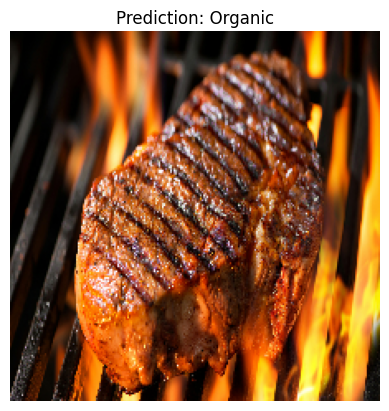

In [ ]:
# Test our model on a custom image
pred_and_plot(model_4, "Grilled-steak.jpg")

In [ ]:
# View our example image
!wget https://joyofandroid.com/wp-content/uploads/2017/03/Broken-Headphones.jpg
earphone = mpimg.imread("Broken-Headphones.jpg")

--2023-12-07 09:58:28--  https://joyofandroid.com/wp-content/uploads/2017/03/Broken-Headphones.jpg
Resolving joyofandroid.com (joyofandroid.com)... 172.67.194.80, 104.21.52.25, 2606:4700:3036::ac43:c250, ...
Connecting to joyofandroid.com (joyofandroid.com)|172.67.194.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13778 (13K) [image/jpeg]
Saving to: ‘Broken-Headphones.jpg.1’

Broken-Headphones.j 100%[===================>]  13.46K  --.-KB/s    in 0s      

2023-12-07 09:58:28 (96.0 MB/s) - ‘Broken-Headphones.jpg.1’ saved [13778/13778]



1/1 [==============================] - 0s 18ms/step


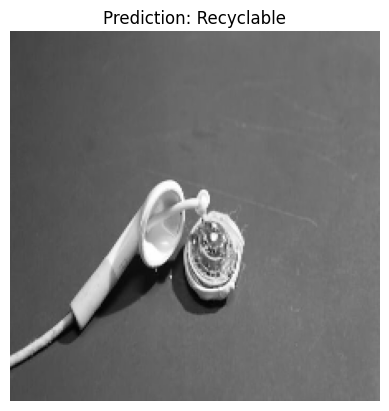

In [ ]:
pred_and_plot(model_4, 'Broken-Headphones.jpg')

In [ ]:
model_4.save("waste_classification_CNN_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('waste_classification_CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# View our example image
!wget https://www.keyscience.org/wp-content/uploads/2017/12/99120637_gettyimages-500712980-thegem-blog-timeline-large.jpg

--2023-12-07 10:16:54--  https://www.keyscience.org/wp-content/uploads/2017/12/99120637_gettyimages-500712980-thegem-blog-timeline-large.jpg
Resolving www.keyscience.org (www.keyscience.org)... 162.241.224.146
Connecting to www.keyscience.org (www.keyscience.org)|162.241.224.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104494 (102K) [image/jpeg]
Saving to: ‘99120637_gettyimages-500712980-thegem-blog-timeline-large.jpg’

99120637_gettyimage 100%[===================>] 102.04K  --.-KB/s    in 0.07s   

2023-12-07 10:16:54 (1.38 MB/s) - ‘99120637_gettyimages-500712980-thegem-blog-timeline-large.jpg’ saved [104494/104494]



1/1 [==============================] - 0s 19ms/step


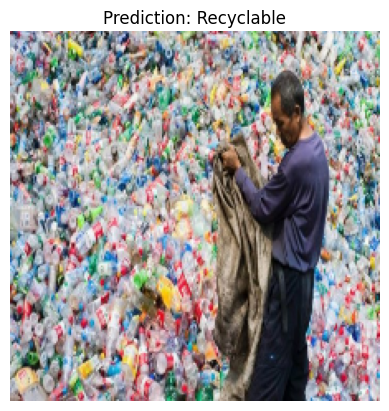

In [ ]:
pred_and_plot(model_4, '99120637_gettyimages-500712980-thegem-blog-timeline-large.jpg')

In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 0.2472 - accuracy: 0.9160


[0.24722595512866974, 0.9160366058349609]

In [ ]:
# View our example image
!wget https://www.whitehorsedc.gov.uk/wp-content/uploads/sites/3/2020/07/Bulky-waste-1-scaled.jpg

--2023-12-07 11:47:36--  https://www.whitehorsedc.gov.uk/wp-content/uploads/sites/3/2020/07/Bulky-waste-1-scaled.jpg
Resolving www.whitehorsedc.gov.uk (www.whitehorsedc.gov.uk)... 80.75.66.241, 2001:470:6e0a::1b:241
Connecting to www.whitehorsedc.gov.uk (www.whitehorsedc.gov.uk)|80.75.66.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 701201 (685K) [image/jpeg]
Saving to: ‘Bulky-waste-1-scaled.jpg’

Bulky-waste-1-scale 100%[===================>] 684.77K  1.41MB/s    in 0.5s    

2023-12-07 11:47:37 (1.41 MB/s) - ‘Bulky-waste-1-scaled.jpg’ saved [701201/701201]



1/1 [==============================] - 0s 23ms/step


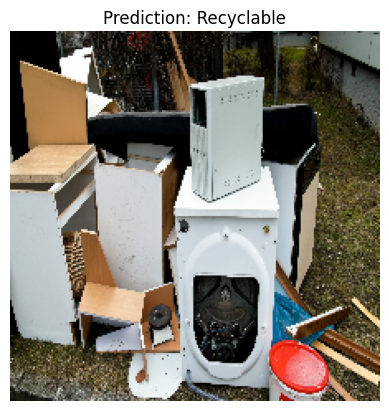

In [ ]:
pred_and_plot(model_4, 'Bulky-waste-1-scaled.jpg')

## Using EfficientNetB0


### Building a feature extraction model


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_7 (Dense)             (None, 2)                 2562      
                                                                 
 softmax_float (Activation)  (None, 2)                 0         
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 2562 (10.0

### Check layer dtype policy

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
  print(layer.name, layer.trainable,  layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "float32">
global_average_pooling2d True float32 <Policy "float32">
dense_7 True float32 <Policy "float32">
softmax_float True float32 <Policy "float32">


### Fit model

In [ ]:
# Fit the feature extraction model
history_waste_classification_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
)

Epoch 1/3
706/706 [==============================] - 79s 100ms/step - loss: 0.7414 - accuracy: 0.5382 - val_loss: 0.6812 - val_accuracy: 0.5852
Epoch 2/3
706/706 [==============================] - 69s 98ms/step - loss: 0.7344 - accuracy: 0.5337 - val_loss: 0.7013 - val_accuracy: 0.4659
Epoch 3/3
706/706 [==============================] - 72s 101ms/step - loss: 0.7295 - accuracy: 0.5092 - val_loss: 0.8313 - val_accuracy: 0.5426


### Fine-tuning

In [ ]:
# Unfrozen all of the layers in base model
base_model.trainable = True

# Refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# Fine-tune for 3 more epochs
fine_tune_epochs = 6
history_waste_classification_fine_tune = model.fit(train_data,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.15 * len(test_data)),
)

Epoch 1/6
706/706 [==============================] - 81s 105ms/step - loss: 0.7254 - accuracy: 0.5096 - val_loss: 0.6889 - val_accuracy: 0.5540
Epoch 2/6
706/706 [==============================] - 72s 102ms/step - loss: 0.7012 - accuracy: 0.5459 - val_loss: 0.6977 - val_accuracy: 0.5455
Epoch 3/6
706/706 [==============================] - 69s 97ms/step - loss: 0.7034 - accuracy: 0.5395 - val_loss: 0.6918 - val_accuracy: 0.5540
Epoch 4/6
706/706 [==============================] - 72s 101ms/step - loss: 0.7017 - accuracy: 0.5245 - val_loss: 0.7014 - val_accuracy: 0.5199
Epoch 5/6
706/706 [==============================] - 72s 101ms/step - loss: 0.6970 - accuracy: 0.5315 - val_loss: 0.6937 - val_accuracy: 0.4290
Epoch 6/6
706/706 [==============================] - 70s 99ms/step - loss: 0.6929 - accuracy: 0.5456 - val_loss: 0.7108 - val_accuracy: 0.4176


## Using ResNet

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can have a layer like below
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # makes sure layers which should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float")(x)
res_model = tf.keras.Model(inputs, outputs)

# Compile the model
res_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
res_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 2)                 4098      
                                                                 
 softmax_float (Activation)  (None, 2)                 0         
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (1

In [ ]:
# Fit the feature extraction model
history_waste_classification_resnet_feature_extract = res_model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
)

Epoch 1/3
706/706 [==============================] - 88s 117ms/step - loss: 0.6781 - accuracy: 0.5850 - val_loss: 0.5960 - val_accuracy: 0.7102
Epoch 2/3
706/706 [==============================] - 80s 114ms/step - loss: 0.6476 - accuracy: 0.6335 - val_loss: 0.5996 - val_accuracy: 0.7102
Epoch 3/3
706/706 [==============================] - 85s 120ms/step - loss: 0.6320 - accuracy: 0.6427 - val_loss: 0.5435 - val_accuracy: 0.7784


### Fine-tuning

In [ ]:
# Unfrozen all of the layers in base model
base_model.trainable = True

# Refreeze every layer except the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning
res_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
# Fine-tune for 3 more epochs
fine_tune_epochs = 6
history_waste_classification_resnet_fine_tune = res_model.fit(train_data,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.15 * len(test_data)),
)

Epoch 1/6
706/706 [==============================] - 79s 112ms/step - loss: 0.5801 - accuracy: 0.7026 - val_loss: 0.5354 - val_accuracy: 0.7699
Epoch 2/6
706/706 [==============================] - 80s 113ms/step - loss: 0.5793 - accuracy: 0.7077 - val_loss: 0.5342 - val_accuracy: 0.8040
Epoch 3/6
706/706 [==============================] - 80s 114ms/step - loss: 0.5754 - accuracy: 0.7097 - val_loss: 0.5439 - val_accuracy: 0.7528
Epoch 4/6
706/706 [==============================] - 79s 112ms/step - loss: 0.5776 - accuracy: 0.7088 - val_loss: 0.5664 - val_accuracy: 0.7472
Epoch 5/6
706/706 [==============================] - 79s 112ms/step - loss: 0.5747 - accuracy: 0.7071 - val_loss: 0.5483 - val_accuracy: 0.7699
Epoch 6/6
706/706 [==============================] - 80s 113ms/step - loss: 0.5752 - accuracy: 0.7118 - val_loss: 0.5469 - val_accuracy: 0.7472


In [18]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Specify the input shape based on your model architecture
input_shape = (224, 224, 3)  # Replace with actual values

# Load the model with the specified input shape
new_model = load_model('waste_classification_CNN_model.h5')

ValueError: ignored

In [15]:
new_model.summary()


NameError: ignored